<a href="https://colab.research.google.com/github/njuve/Cousera/blob/master/Group_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group_B
- 参加者ごとの平均データ
  - 参加者ひとりひとりに各データを平均化
    - 例：参加者1番の1ヶ月における平均夕食時間は19時21分
  - 記録数の足切り数を設定する必要

- 一人ひとりの被験者について、平均の朝食時間、昼食時間、夕食時間、間食時間、間食平均回数を出し、それを全体で重ねていきデータ分析をしていきたい
今回は、ここでの有効データを定義を決定したい
- 研究期間中最低3回は食事の記録をしている人
- BMIが異常に低いまたは高い人
- フランスの食事に関する研究では、一ヶ月のうちランダムに3日間を取り出して、研究データとして取り出したものもある 


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from google.colab import files

In [0]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10000)

In [0]:
data_query = pd.read_gbq('select * from `healthcare-1335.taberhythm_analytics.groupb`', 'healthcare-1335', dialect='standard')

In [0]:
data = data_query.copy()
data = data.drop_duplicates().copy()
data = data[data.ate_at <= '2019-2-21'].copy()
data = data[data.created_at <= '2019-2-21'].copy()

In [0]:
data_query.head()

,user_id,timing,ate_at,age,gender,created_at
0,128,drink,2018-07-31 22:21:33,54,male,2018-07-31 22:21:41
1,128,drink,2018-07-31 22:27:04,54,male,2018-07-31 22:27:09
2,128,drink,2018-08-01 07:45:43,54,male,2018-08-01 07:45:49
3,128,drink,2018-08-01 11:33:33,54,male,2018-08-01 11:33:40
4,128,drink,2018-08-07 16:40:33,54,male,2018-08-07 16:40:39


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21841 entries, 0 to 22385
Data columns (total 6 columns):
user_id       21841 non-null int64
timing        21841 non-null object
ate_at        21841 non-null datetime64[ns]
age           21841 non-null int64
gender        21841 non-null object
created_at    21841 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 1.2+ MB


In [0]:
data.user_id.nunique()

1589

In [0]:
data.ate_at.max()

Timestamp('2019-02-20 21:30:41')

In [0]:
data[data.timing == 'breakfast'].user_id.nunique()

1126

## 抽出条件を満たしているかチェック

In [0]:
test = data.copy()

In [0]:
test['day'] = test.ate_at.dt.strftime('%Y%m%d')

In [0]:
test[test.user_id == 15].head()

,user_id,timing,ate_at,age,gender,created_at,day
16690,15,lunch,2018-07-30 12:10:00,69,male,2018-07-30 15:14:44,20180730
16691,15,lunch,2018-07-31 12:30:00,69,male,2018-07-31 12:30:01,20180731
16692,15,lunch,2018-08-01 12:15:00,69,male,2018-08-02 09:43:13,20180801
16693,15,lunch,2018-08-03 12:45:00,69,male,2018-08-04 01:18:09,20180803
16694,15,lunch,2018-08-02 13:03:00,69,male,2018-08-04 01:20:13,20180802


In [0]:
test.groupby('user_id').day.nunique().max()

30

## 食事回数

In [0]:
data_temp = data.copy()
data_temp['n'] = data_temp.groupby(['user_id', 'timing']).cumcount()+1

In [0]:
data_breakfast = data_temp[data_temp.timing == 'breakfast'].pivot_table(index = 'user_id', columns = 'n', values='ate_at',aggfunc = 'count')
data_lunch = data_temp[data_temp.timing == 'lunch'].pivot_table(index = 'user_id', columns = 'n', values='ate_at',aggfunc = 'count')
data_dinner = data_temp[data_temp.timing == 'dinner'].pivot_table(index = 'user_id', columns = 'n', values='ate_at',aggfunc = 'count')
data_snack = data_temp[data_temp.timing == 'snack'].pivot_table(index = 'user_id', columns = 'n', values='ate_at',aggfunc = 'count')
data_drink = data_temp[data_temp.timing == 'drink'].pivot_table(index = 'user_id', columns = 'n', values='ate_at',aggfunc = 'count')

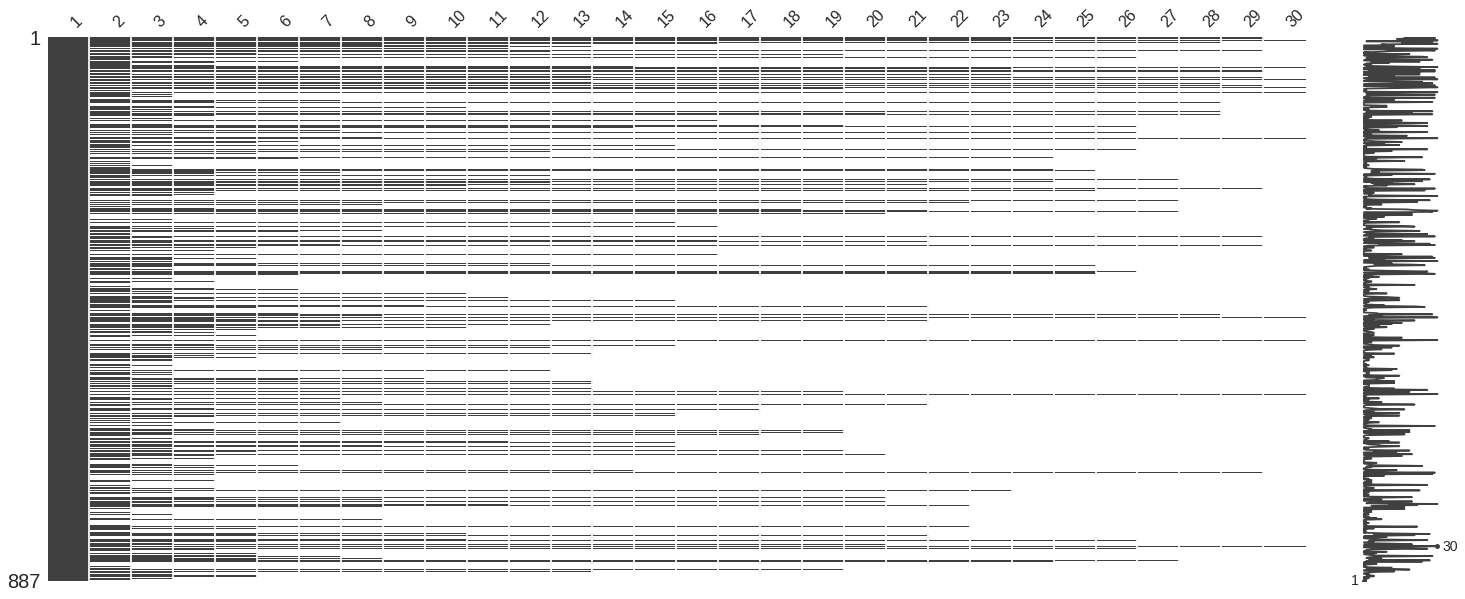

In [0]:

msno.matrix(data_dinner)

### ユーザーごとのデータ数

In [0]:
tab_count_per_user = data.groupby(['user_id', 'timing']).count()
display(tab_count_per_user)

ate_at  age  gender  created_at
user_id timing                                    
15      breakfast      30   30      30          30
        dinner         29   29      29          29
        lunch          29   29      29          29
16      breakfast      14   14      14          14
        dinner         17   17      17          17
        drink           3    3       3           3
        lunch          17   17      17          17
        snack           6    6       6           6
17      breakfast       1    1       1           1
19      breakfast      29   29      29          29
        dinner         29   29      29          29
        drink          21   21      21          21
        lunch          29   29      29          29
        snack           4    4       4           4
20      breakfast      24   24      24          24
        dinner         14   14      14          14
        drink           1    1       1           1
        lunch          18   18      18          18
        snack           7    7       7           7
22      breakfast      28   28      28          28
        dinner         23   23      23          23
        lunch          27   27      27          27
        snack          26   26      26          26
25      breakfast      27   27      27          27
        dinner         30   30      30          30
        drink           2    2       2           2
        lunch          30   30      30          30
        snack          56   56      56          56
26      breakfast      16   16      16          16
        dinner         30   30      30          30
        drink           4    4       4           4
        lunch          30   30      30          30
        snack          24   24      24          24
28      breakfast       2    2       2           2
        dinner          2    2       2           2
        drink           1    1       1           1
29      breakfast      28   28      28          28
        dinner         28   28      28          28
        drink           3    3       3           3
        lunch          30   30      30          30
        snack          49   49      49          49
30      breakfast      14   14      14          14
        dinner         16   16      16          16
        drink           5    5       5           5
        lunch          18   18      18          18
        snack           5    5       5           5
31      breakfast       9    9       9           9
        dinner         16   16      16          16
        drink           5    5       5           5
        lunch          23   23      23          23
        snack          36   36      36          36
32      breakfast      28   28      28          28
        dinner         30   30      30          30
        drink           3    3       3           3
        lunch          30   30      30          30
        snack          12   12      12          12
34      lunch           1    1       1           1
36      breakfast      14   14      14          14
        dinner          8    8       8           8
        drink           6    6       6           6
        lunch           8    8       8           8
        snack           4    4       4           4
38      breakfast      13   13      13          13
        dinner         11   11      11          11
        drink           1    1       1           1
        lunch          17   17      17          17
        snack           5    5       5           5
40      breakfast       1    1       1           1
        dinner          1    1       1           1
        lunch           1    1       1           1
42      breakfast       1    1       1           1
43      breakfast      14   14      14          14
        dinner         13   13      13          13
        lunch          15   15      15          15
        snack           6    6       6           6
44      breakfast      10   10      10          10
        dinner         11   11      11   

### timing

In [0]:
tab_count_per_user = tab_count_per_user.reset_index()

In [0]:
tab_count_per_timing = tab_count_per_user.groupby(['timing']).ate_at.value_counts().to_frame()
tab_count_per_timing.columns = ['count_ate']
display(tab_count_per_timing.sort_index())

count_ate
timing    ate_at           
breakfast 1             618
          2             114
          3              66
          4              41
          5              35
          6              27
          7              19
          8              12
          9              15
          10              7
          11             11
          12              9
          13              9
          14             13
          15              5
          16             13
          17             11
          18              4
          19              5
          20              5
          21              2
          22              6
          23              5
          24              4
          25             11
          26             11
          27              8
          28             17
          29             21
          30              2
dinner    1             360
          2             114
          3              81
          4              55
          5              32
          6              21
          7              14
          8              15
          9               6
          10             10
          11              8
          12             10
          13              9
          14              6
          15             12
          16             10
          17              7
          18              3
          19              8
          20              8
          21             12
          22              3
          23              7
          24              8
          25              6
          26             11
          27              6
          28             11
          29             17
          30             17
drink     1             172
          2              53
          3              30
          4              20
          5              12
          6              14
          7               5
          8               4
          9               1
          10              4
          11              2
          12              7
          13              2
          15              3
          16              1
          17              2
          18              3
          19              1
          20              3
          21              1
          26              1
          29              1
          40              1
          44              1
          46              2
          48              1
          53              1
lunch     1             431
          2             140
          3              78
          4              36
          5              32
          6              31
          7              19
          8              13
          9              13
          10              9
          11              7
          12              7
          13              8
          14             12
          15             10
          16              9
          17              7
          18             10
          19              7
          20              8
          21              6
          22              5
          23              7
          24              5
          25              9
          26             10
          27             15
          28             12
          29             16
          30             15
snack     1             194
          2              75
          3              53
          4              28
          5              29
          6              19
          7              13
          8              12
          9              10
          10             12
          11              9
          12              3
          13              6
          14              2
          15              8
          16              6
          17              4
          18              3
          19              2
          20              6
          21              1
          22              4
          24              3
          25              1
          26  

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


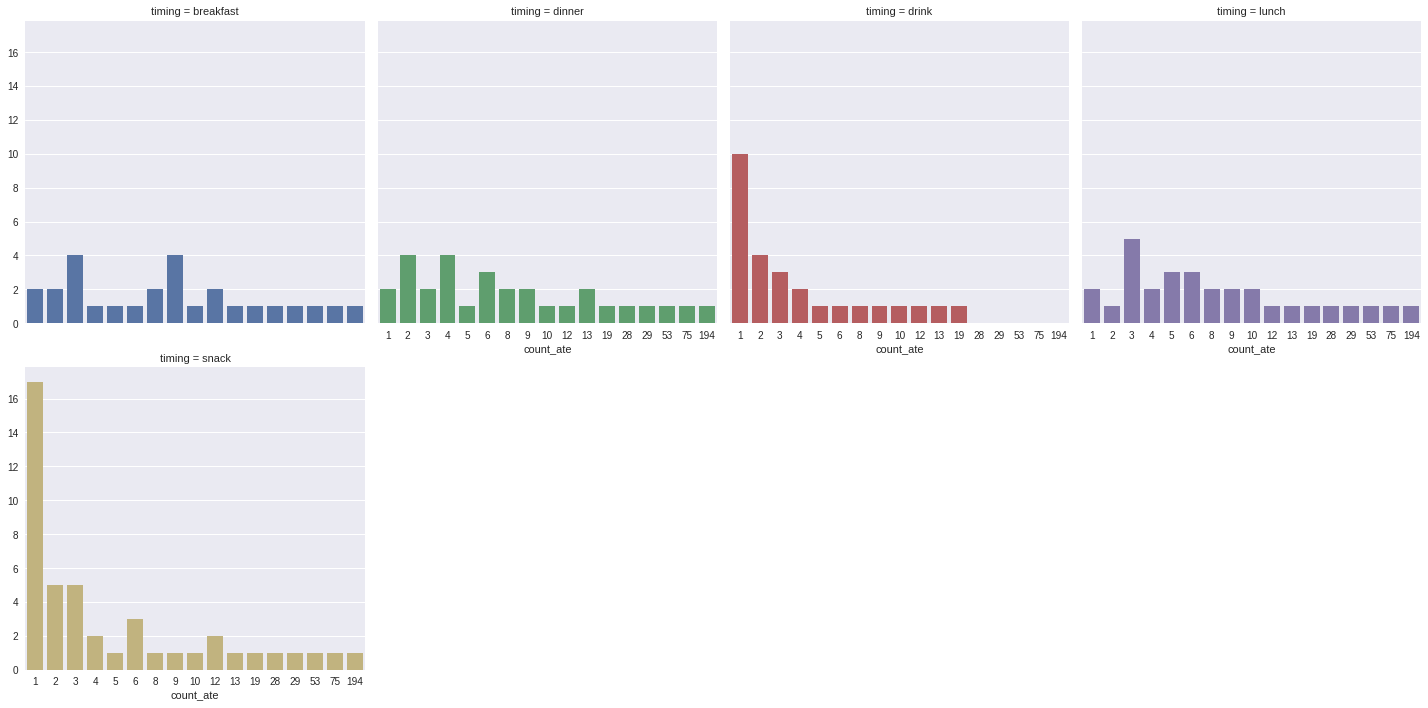

In [0]:
grid = sns.FacetGrid(tab_count_per_timing.reset_index(), col="timing", hue="timing", col_wrap=4, size=5)
grid.map(sns.countplot, 'count_ate')

In [0]:
tab_count_per_timing_temp = tab_count_per_timing.reset_index()

In [0]:
def count_table(n):
    result = tab_count_per_timing_temp[tab_count_per_timing_temp.ate_at >= n].groupby('timing').sum()
    result['all_user'] = 2818
    result['percent'] = result['count_ate']/ result['all_user']
    result['value'] = n
    result = result.drop(columns = 'ate_at')
    result.columns = ['count_user', 'all_user', 'percent','value']
    result = result[['all_user','count_user', 'percent', 'value']]
    print('{}回以上データあり'.format(n))
    return result

In [0]:
df_count = pd.DataFrame(index=[])
for i in range(1,11):
  temp = count_table(i)
  df_count = pd.concat([df_count,temp]) 
  display(temp)
df_count = df_count.reset_index().sort_values(['timing', 'value'])

1回以上データあり


,all_user,count_user,percent,value
timing,,,,
breakfast,2818,1126,0.399574,1
dinner,2818,887,0.314762,1
drink,2818,348,0.123492,1
lunch,2818,987,0.350248,1
snack,2818,535,0.189851,1


2回以上データあり


,all_user,count_user,percent,value
timing,,,,
breakfast,2818,508,0.180270,2
dinner,2818,527,0.187012,2
drink,2818,176,0.062456,2
lunch,2818,556,0.197303,2
snack,2818,341,0.121008,2


3回以上データあり


,all_user,count_user,percent,value
timing,,,,
breakfast,2818,394,0.139815,3
dinner,2818,413,0.146558,3
drink,2818,123,0.043648,3
lunch,2818,416,0.147622,3
snack,2818,266,0.094393,3


4回以上データあり


,all_user,count_user,percent,value
timing,,,,
breakfast,2818,328,0.116395,4
dinner,2818,332,0.117814,4
drink,2818,93,0.033002,4
lunch,2818,338,0.119943,4
snack,2818,213,0.075586,4


5回以上データあり


,all_user,count_user,percent,value
timing,,,,
breakfast,2818,287,0.101845,5
dinner,2818,277,0.098297,5
drink,2818,73,0.025905,5
lunch,2818,302,0.107168,5
snack,2818,185,0.065649,5


6回以上データあり


,all_user,count_user,percent,value
timing,,,,
breakfast,2818,252,0.089425,6
dinner,2818,245,0.086941,6
drink,2818,61,0.021647,6
lunch,2818,270,0.095813,6
snack,2818,156,0.055358,6


7回以上データあり


,all_user,count_user,percent,value
timing,,,,
breakfast,2818,225,0.079844,7
dinner,2818,224,0.079489,7
drink,2818,47,0.016678,7
lunch,2818,239,0.084812,7
snack,2818,137,0.048616,7


8回以上データあり


,all_user,count_user,percent,value
timing,,,,
breakfast,2818,206,0.073101,8
dinner,2818,210,0.074521,8
drink,2818,42,0.014904,8
lunch,2818,220,0.078070,8
snack,2818,124,0.044003,8


9回以上データあり


,all_user,count_user,percent,value
timing,,,,
breakfast,2818,194,0.068843,9
dinner,2818,195,0.069198,9
drink,2818,38,0.013485,9
lunch,2818,207,0.073456,9
snack,2818,112,0.039744,9


10回以上データあり


,all_user,count_user,percent,value
timing,,,,
breakfast,2818,179,0.063520,10
dinner,2818,189,0.067069,10
drink,2818,37,0.013130,10
lunch,2818,194,0.068843,10
snack,2818,102,0.036196,10


In [0]:
#  上の表をconcatしたdf、人数を見る時に便利？
df_count;

---
## 時刻×人数

### 時間を変換

In [0]:
data['elapsed_time'] = (data.ate_at - pd.to_datetime(data.ate_at.dt.strftime('%Y-%m-%d 00:00:00')))/np.timedelta64(1,'m')

In [0]:
data['time'] = data.ate_at.apply(lambda time:time.strftime('%H%M')).copy()

In [0]:
data.head()

,user_id,timing,ate_at,age,gender,created_at,elapsed_time,time
0,128,drink,2018-07-31 22:21:33,54,male,2018-07-31 22:21:41,1341.550000,2221
1,128,drink,2018-07-31 22:27:04,54,male,2018-07-31 22:27:09,1347.066667,2227
2,128,drink,2018-08-01 07:45:43,54,male,2018-08-01 07:45:49,465.716667,0745
3,128,drink,2018-08-01 11:33:33,54,male,2018-08-01 11:33:40,693.550000,1133
4,128,drink,2018-08-07 16:40:33,54,male,2018-08-07 16:40:39,1000.550000,1640


In [0]:
tab_count_per_user.head()

,user_id,timing,ate_at,age,gender,created_at
0,15,breakfast,30,30,30,30
1,15,dinner,29,29,29,29
2,15,lunch,29,29,29,29
3,16,breakfast,14,14,14,14
4,16,dinner,17,17,17,17


### 年代追加

In [0]:
data['age_per_10'] = data.age.apply(lambda age: min(int(np.floor(age/10)*10), 50))
data['age_per_10'] = data['age_per_10'].astype(str) + 's'

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22063 entries, 0 to 22385
Data columns (total 9 columns):
user_id         22063 non-null int64
timing          22063 non-null object
ate_at          22063 non-null datetime64[ns]
age             22063 non-null int64
gender          22063 non-null object
created_at      22063 non-null datetime64[ns]
elapsed_time    22063 non-null float64
time            22063 non-null object
age_per_10      22063 non-null object
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 2.3+ MB


In [0]:
data.age_per_10.head()

0    50s
1    50s
2    50s
3    50s
4    50s
Name: age_per_10, dtype: object

### BMI追加

In [0]:
# weightなどのデータを引っ張る
data_info = pd.read_gbq('select * from `healthcare-1335.taberhythm_analytics.table_all_id_profile`', 'healthcare-1335', dialect='standard')

In [0]:
data_with_info = pd.merge(data, data_info[['user_id', 'weight', 'height']], on = 'user_id')

In [0]:
data_with_info['bmi'] = data_with_info['weight']/((data_with_info['height']/100)**2)

In [0]:
data_with_info.head()

,user_id,timing,ate_at,age,gender,created_at,elapsed_time,time,age_per_10,weight,height,bmi
0,128,drink,2018-07-31 22:21:33,54,male,2018-07-31 22:21:41,1341.550000,2221,50s,74.0,176,23.889463
1,128,drink,2018-07-31 22:27:04,54,male,2018-07-31 22:27:09,1347.066667,2227,50s,74.0,176,23.889463
2,128,drink,2018-08-01 07:45:43,54,male,2018-08-01 07:45:49,465.716667,0745,50s,74.0,176,23.889463
3,128,drink,2018-08-01 11:33:33,54,male,2018-08-01 11:33:40,693.550000,1133,50s,74.0,176,23.889463
4,128,drink,2018-08-07 16:40:33,54,male,2018-08-07 16:40:39,1000.550000,1640,50s,74.0,176,23.889463


In [0]:
def rank_bmi(bmi):
  if bmi < 18.5:
    result = 'slim'
  elif bmi < 20.0:
    result = 'normal1'
  elif bmi < 22.0:
    result = 'normal2'
  elif bmi < 25.0:
    result = 'normal3'
  elif bmi < 30.0:
    result = 'obesity_level_1'
  elif bmi >=30.0:
    result = 'obesity_level_2_over'
  return result

In [0]:
data_with_info['rank_bmi'] = data_with_info.bmi.apply(lambda bmi: rank_bmi(bmi))

In [0]:
users = pd.read_gbq('select * from `healthcare-1335.taberhythm_analytics.first_study_finished_users`', 'healthcare-1335', dialect='standard')

NameError: ignored

### ３回以上データありdf

In [0]:
def create_df(n, meal_type):
  '''
      n回以上データありユーザのdataframe作成
  '''
  df_terget_meal = tab_count_per_user[tab_count_per_user['timing'] == meal_type]
  df_ref = df_terget_meal[df_terget_meal.ate_at >= n]
  df = data_with_info.copy()
  df['is_ok'] = df.user_id.apply(lambda id: 1 if id in df_ref.user_id.values else 0)
  df = df[df.is_ok == 1].drop(columns = 'is_ok')
  
  return df

In [0]:
# ３回以上データがある人
df_3 = create_df(3, 'breakfast')

In [0]:
df_3.head()

,user_id,timing,ate_at,age,gender,created_at,elapsed_time,time,age_per_10,weight,height,bmi,rank_bmi
0,128,drink,2018-07-31 22:21:33,54,male,2018-07-31 22:21:41,1341.550000,2221,50s,74.0,176,23.889463,normal3
1,128,drink,2018-07-31 22:27:04,54,male,2018-07-31 22:27:09,1347.066667,2227,50s,74.0,176,23.889463,normal3
2,128,drink,2018-08-01 07:45:43,54,male,2018-08-01 07:45:49,465.716667,0745,50s,74.0,176,23.889463,normal3
3,128,drink,2018-08-01 11:33:33,54,male,2018-08-01 11:33:40,693.550000,1133,50s,74.0,176,23.889463,normal3
4,128,drink,2018-08-07 16:40:33,54,male,2018-08-07 16:40:39,1000.550000,1640,50s,74.0,176,23.889463,normal3


In [0]:
df_3.describe()

,user_id,age,elapsed_time,weight,height,bmi
count,18349.000000,18349.000000,18349.000000,18349.000000,18349.000000,18349.000000
mean,1440.318655,37.700038,824.314209,62.447528,162.281160,23.566897
std,1177.006831,12.774040,311.221541,16.243251,7.781476,5.229632
min,15.000000,20.000000,0.000000,37.099998,140.000000,14.675052
25%,297.000000,26.000000,565.033333,50.000000,157.000000,19.628265
50%,1181.000000,37.000000,780.000000,58.000000,161.000000,22.512418
75%,2527.000000,48.000000,1118.300000,71.000000,168.000000,25.503616
max,3553.000000,69.000000,1439.116667,130.000000,184.000000,46.181983


In [0]:
def create_table_of_age_gender(df):
  '''
  ユーザーの属性を見る
  '''
  gender = df.gender.value_counts().to_frame()
  age = df.age_per_10.value_counts().to_frame()
  display(gender)
  display(age)

In [0]:
create_table_of_age_gender(df_3.drop_duplicates(subset = 'user_id'))

,gender
female,283
male,111


,age_per_10
20s,158
30s,88
40s,81
50s,67


## ユーザー平均

In [0]:
df_3.head()

,user_id,timing,ate_at,age,gender,created_at,elapsed_time,time,age_per_10,weight,height,bmi,rank_bmi
0,128,drink,2018-07-31 22:21:33,54,male,2018-07-31 22:21:41,1341.550000,2221,50s,74.0,176,23.889463,normal3
1,128,drink,2018-07-31 22:27:04,54,male,2018-07-31 22:27:09,1347.066667,2227,50s,74.0,176,23.889463,normal3
2,128,drink,2018-08-01 07:45:43,54,male,2018-08-01 07:45:49,465.716667,0745,50s,74.0,176,23.889463,normal3
3,128,drink,2018-08-01 11:33:33,54,male,2018-08-01 11:33:40,693.550000,1133,50s,74.0,176,23.889463,normal3
4,128,drink,2018-08-07 16:40:33,54,male,2018-08-07 16:40:39,1000.550000,1640,50s,74.0,176,23.889463,normal3


In [0]:
def mean_df(df):
  mean = df.groupby(['user_id', 'timing']).elapsed_time.mean().to_frame().reset_index()
  df_output = pd.merge(mean, df[['user_id', 'gender','age','age_per_10','bmi','weight','height','rank_bmi']].drop_duplicates(),on = ['user_id'])
  df_output['is_fat'] = df_output.bmi.apply(lambda bmi: 'fat' if bmi >= 25 else 'not_fat')
  return df_output

In [0]:
df_3_mean = mean_df(df_3)

In [0]:
df_3_mean.head()

,user_id,timing,elapsed_time,gender,age,age_per_10,bmi,weight,height,rank_bmi,is_fat
0,15,breakfast,467.839444,male,69,50s,26.212076,70.5,164,obesity_level_1,fat
1,15,dinner,1154.944828,male,69,50s,26.212076,70.5,164,obesity_level_1,fat
2,15,lunch,778.531034,male,69,50s,26.212076,70.5,164,obesity_level_1,fat
3,16,breakfast,464.852381,male,43,40s,24.964946,73.0,171,normal3,not_fat
4,16,dinner,1209.507843,male,43,40s,24.964946,73.0,171,normal3,not_fat


In [0]:
#df_3_mean.to_csv("df_3_mean.csv")

In [0]:
from google.colab import files
files.download("df_3_mean.csv")

## 朝食の相関関係

In [0]:
df_3_mean[df_3_mean['timing'] == 'breakfast'].corr(method='pearson')

,user_id,elapsed_time,age,bmi,weight,height
user_id,1.000000,0.106503,-0.190163,0.105505,0.004384,-0.205626
elapsed_time,0.106503,1.000000,-0.227389,-0.058507,-0.087644,-0.074593
age,-0.190163,-0.227389,1.000000,0.204062,0.273698,0.242095
bmi,0.105505,-0.058507,0.204062,1.000000,0.904379,0.150610
weight,0.004384,-0.087644,0.273698,0.904379,1.000000,0.550118
height,-0.205626,-0.074593,0.242095,0.150610,0.550118,1.000000


In [0]:
create_table_of_age_gender(df_3_mean.drop_duplicates(subset='user_id'))

,gender
female,283
male,111


,age_per_10
20s,158
30s,88
40s,81
50s,67


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


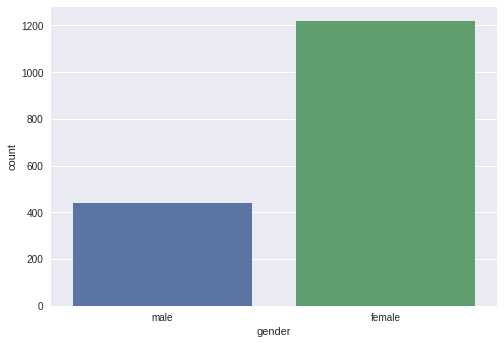

In [0]:
sns.countplot(x = df_3_mean.gender)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


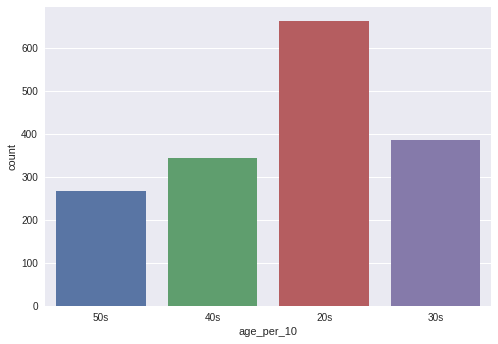

In [0]:
sns.countplot(x = df_3_mean.age_per_10)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


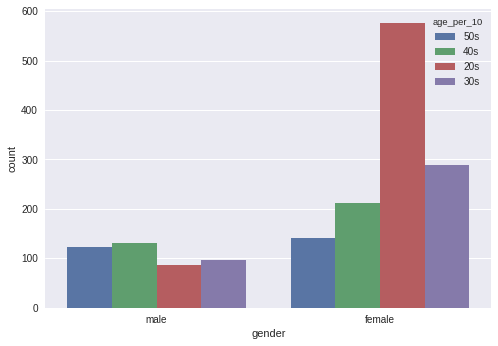

In [0]:
sns.countplot(x = df_3_mean.gender, hue = df_3_mean.age_per_10)

In [0]:
df_3_mean.rank;

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


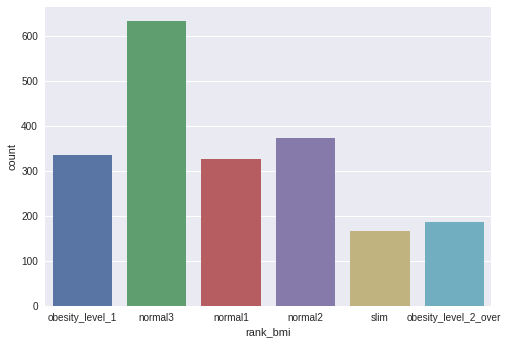

In [0]:
sns.countplot(x = df_3_mean.rank_bmi,)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


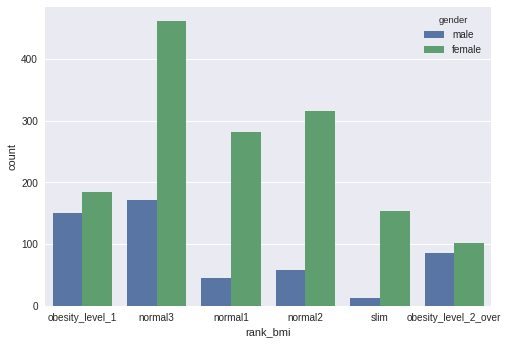

In [0]:
sns.countplot(x = df_3_mean.rank_bmi, hue = df_3_mean.gender)

In [0]:
df_3_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2022
Data columns (total 11 columns):
user_id         2023 non-null int64
timing          2023 non-null object
elapsed_time    2023 non-null float64
gender          2023 non-null object
age             2023 non-null int64
age_per_10      2023 non-null object
bmi             2023 non-null float64
weight          2023 non-null float64
height          2023 non-null int64
rank_bmi        2023 non-null object
is_fat          2023 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 189.7+ KB


Breakfast


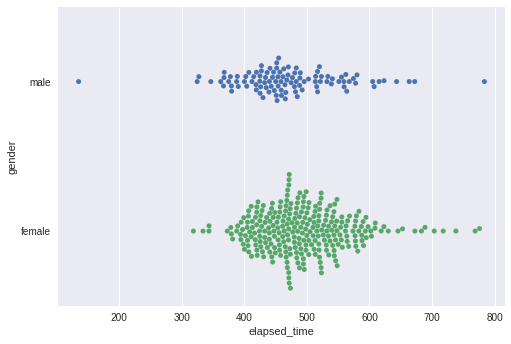

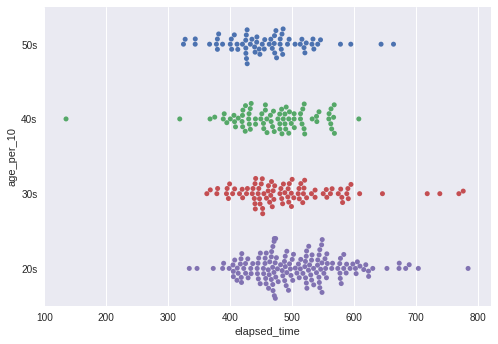

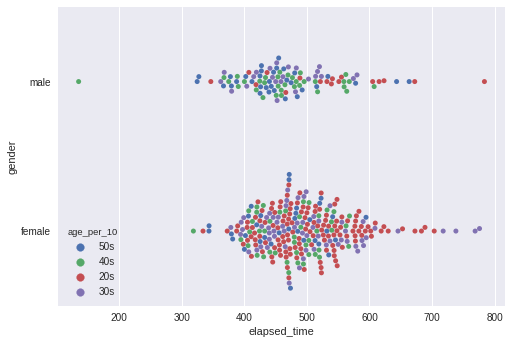

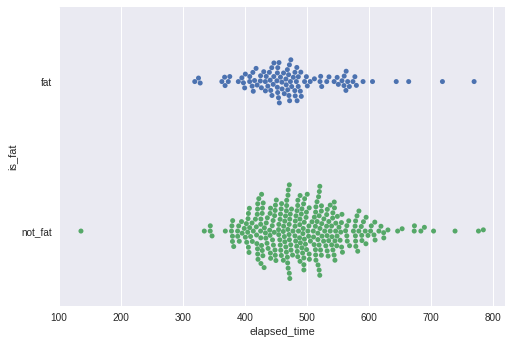

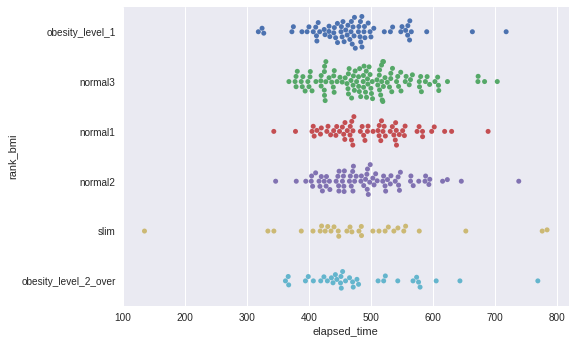

In [0]:
print('Breakfast')
ax.set_xticks([100*x for x in np.arange(13)])
ax = sns.swarmplot(x = 'elapsed_time', y = 'gender', data = df_3_mean[df_3_mean.timing == 'breakfast'])
plt.show()
ax = sns.swarmplot(x = 'elapsed_time', y = 'age_per_10', data = df_3_mean[df_3_mean.timing == 'breakfast'], order = ['50s', '40s','30s','20s'])
plt.show()
ax = sns.swarmplot(x = 'elapsed_time', y = 'gender', hue = 'age_per_10' ,data = df_3_mean[df_3_mean.timing == 'breakfast'])
plt.show()
ax = sns.swarmplot(x = 'elapsed_time', y = 'is_fat' ,data = df_3_mean[df_3_mean.timing == 'breakfast'])
plt.show()
ax = sns.swarmplot(x = 'elapsed_time', y = 'rank_bmi' ,data = df_3_mean[df_3_mean.timing == 'breakfast'])
plt.show()
# plt.savefig('breakfast_swarmplot.png')
# files.download("breakfast_swarmplot.png")

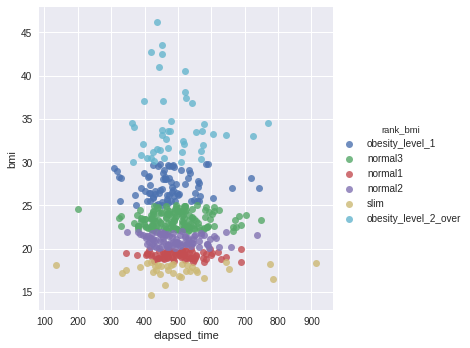

In [0]:
sns.lmplot(x = 'elapsed_time', y ='bmi', hue = 'rank_bmi',data = df_3_mean[df_3_mean.timing == 'breakfast'], fit_reg=False)

Lunch


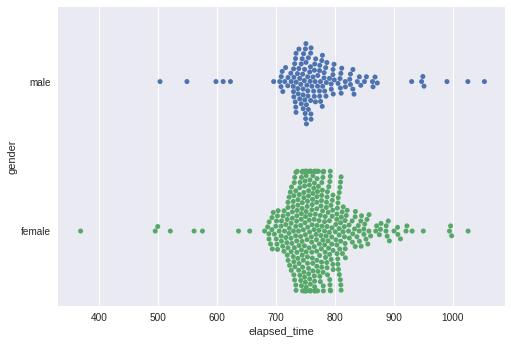

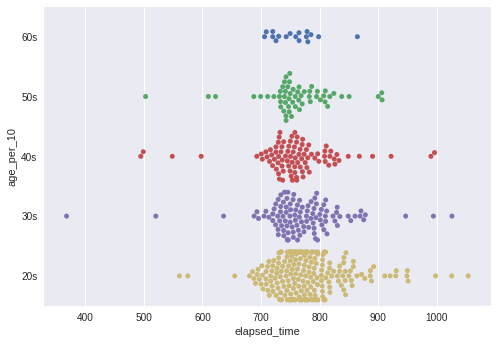

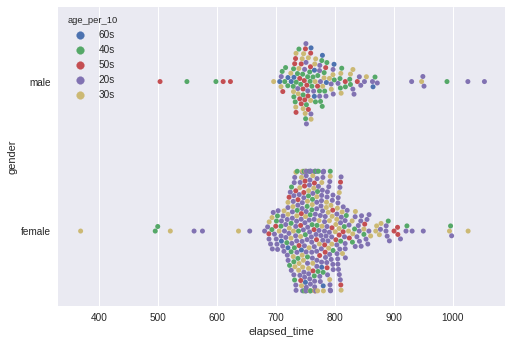

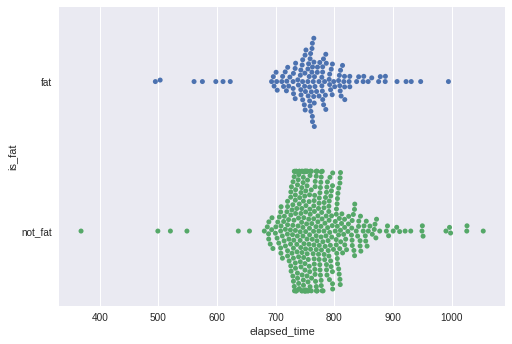

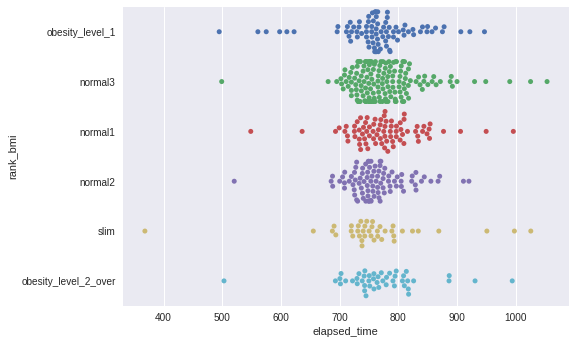

In [0]:
print('Lunch')
ax.set_xticks([100*x for x in np.arange(13)])
ax = sns.swarmplot(x = 'elapsed_time', y = 'gender', data = df_3_mean[df_3_mean.timing == 'lunch'])
plt.show()
ax = sns.swarmplot(x = 'elapsed_time', y = 'age_per_10', data = df_3_mean[df_3_mean.timing == 'lunch'], order = ['60s', '50s', '40s','30s','20s'])
plt.show()
ax = sns.swarmplot(x = 'elapsed_time', y = 'gender', hue = 'age_per_10' ,data = df_3_mean[df_3_mean.timing == 'lunch'])
plt.show()
ax = sns.swarmplot(x = 'elapsed_time', y = 'is_fat' ,data = df_3_mean[df_3_mean.timing == 'lunch'])
plt.show()
ax = sns.swarmplot(x = 'elapsed_time', y = 'rank_bmi' ,data = df_3_mean[df_3_mean.timing == 'lunch'])
plt.show()

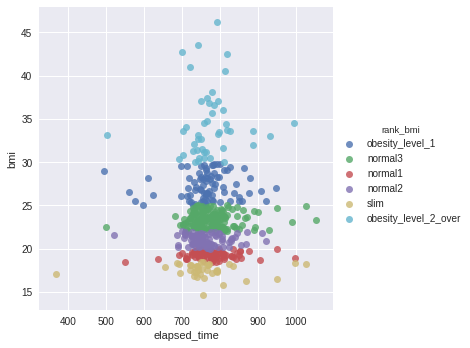

In [0]:
sns.lmplot(x = 'elapsed_time', y ='bmi', hue = 'rank_bmi',data = df_3_mean[df_3_mean.timing == 'lunch'], fit_reg=False)

### 平均

In [0]:
df_3_mean.head()

,user_id,timing,elapsed_time,gender,age,age_per_10,bmi,weight,height,is_fat
0,15,breakfast,467.839444,male,69,60s,26.212076,70.5,164,fat
1,15,dinner,1154.944828,male,69,60s,26.212076,70.5,164,fat
2,15,lunch,778.531034,male,69,60s,26.212076,70.5,164,fat
3,16,breakfast,464.852381,male,43,40s,24.964946,73.0,171,not_fat
4,16,dinner,1209.507843,male,43,40s,24.964946,73.0,171,not_fat


In [0]:
df_3_mean.describe()

,user_id,elapsed_time,age,bmi,weight,height
count,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000
mean,1602.705388,833.203310,34.193277,23.467620,61.775976,161.820564
std,1111.114828,274.625094,12.324323,4.762389,14.866711,7.856020
min,15.000000,0.000000,20.000000,14.675052,37.099998,140.000000
25%,624.000000,601.430556,23.000000,20.134780,51.000000,156.000000
50%,1457.000000,799.150000,32.000000,22.512418,58.000000,160.000000
75%,2629.000000,1090.273755,43.000000,25.299376,70.000000,167.000000
max,3470.000000,1425.000000,69.000000,46.181983,130.000000,184.000000


#### 朝食

In [0]:
df_3_mean[df_3_mean.timing == 'breakfast'].describe()['elapsed_time'].to_frame()

,elapsed_time
count,465.000000
mean,492.501672
std,83.715960
min,135.105556
25%,439.344828
50%,484.590741
75%,536.158333
max,914.700000


In [0]:
df_3_mean[df_3_mean.timing == 'breakfast'].groupby('gender').describe()['elapsed_time']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,274.0,494.679299,72.045344,318.550000,445.486310,487.682900,534.850058,775.902381
male,106.0,471.088674,84.200652,135.105556,425.345573,459.185851,516.654672,783.750000


In [0]:
df_3_mean[df_3_mean.timing == 'breakfast'].groupby('age_per_10').describe()['elapsed_time']

,count,mean,std,min,25%,50%,75%,max
age_per_10,,,,,,,,
20s,151.0,506.828287,74.212798,333.931818,457.524540,498.000000,548.018529,783.750000
30s,86.0,495.520826,82.920503,362.250000,442.006250,482.417222,529.085185,775.902381
40s,77.0,468.709771,68.036402,135.105556,430.344828,471.000000,513.366667,607.461111
50s,66.0,458.197163,67.474660,324.562121,421.046591,453.289583,490.638462,663.421875


In [0]:
df_3_mean[df_3_mean.timing == 'breakfast'].groupby('is_fat').describe()['elapsed_time']

,count,mean,std,min,25%,50%,75%,max
is_fat,,,,,,,,
fat,123.0,480.019559,82.551390,307.616667,431.047619,468.461111,521.366026,768.875
not_fat,342.0,496.990853,83.796055,135.105556,441.539338,491.858333,539.617361,914.700


In [0]:
df_3_mean[df_3_mean.timing == 'breakfast'].groupby('rank_bmi').describe()['elapsed_time']

,count,mean,std,min,25%,50%,75%,max
rank_bmi,,,,,,,,
normal1,74.0,505.755564,67.917311,343.467241,459.067727,506.342500,541.063936,688.742857
normal2,88.0,493.905856,70.090187,346.428571,446.377604,484.745370,533.935833,738.145833
normal3,146.0,493.467752,82.406405,200.400000,435.446667,492.633730,534.386806,750.333333
obesity_level_1,79.0,474.518445,79.244608,307.616667,429.139360,468.461111,506.526515,742.075000
obesity_level_2_over,44.0,489.896560,88.251351,362.250000,434.678452,467.937458,528.193333,768.875000
slim,34.0,501.028022,138.906885,135.105556,431.657184,482.566667,541.795833,914.700000


In [0]:
df_3_mean[df_3_mean.timing == 'breakfast'].groupby(['gender', 'rank_bmi']).describe()['elapsed_time']

count        mean         std         min  \
gender rank_bmi                                                          
female normal1                63.0  503.586117   67.183915  343.467241   
       normal2                74.0  500.173048   68.219312  395.000000   
       normal3               104.0  501.354627   75.517004  329.000000   
       obesity_level_1        43.0  484.136673   70.568332  318.550000   
       obesity_level_2_over   24.0  505.786386   95.170917  390.000000   
       slim                   31.0  501.234103  117.899207  333.931818   
male   normal1                11.0  518.180580   74.086971  418.666667   
       normal2                14.0  460.779266   73.062984  346.428571   
       normal3                42.0  473.938347   95.609752  200.400000   
       obesity_level_1        36.0  463.030005   88.144764  307.616667   
       obesity_level_2_over   20.0  470.828770   77.202083  362.250000   
       slim                    3.0  498.898519  331.449426  135.105556   

                                    25%         50%         75%         max  
gender rank_bmi                                                              
female normal1               457.999540  503.393333  540.452941  688.742857  
       normal2               450.379762  493.701389  540.862500  738.145833  
       normal3               444.228274  497.777222  541.721944  703.503125  
       obesity_level_1       439.844905  482.366667  531.904167  717.819444  
       obesity_level_2_over  441.734936  494.438889  549.380000  768.875000  
       slim                  432.969540  480.641667  532.457813  914.700000  
male   normal1               474.582609  516.992593  545.922619  688.550000  
       normal2               411.325580  450.972619  487.398578  615.391667  
       normal3               422.650000  463.912024  519.310139  750.333333  
       obesity_level_1       425.590705  455.811250  484.684167  742.075000  
       obesity_level_2_over  427.096468  455.359127  513.847685  643.342424  
       slim                  356.472778  577.840000  680.795000  783.750000

In [0]:
df_3_mean[df_3_mean.timing == 'breakfast'].groupby(['gender', 'is_fat']).describe()['elapsed_time']

count        mean         std         min         25%  \
gender is_fat                                                           
female fat       67.0  491.891794   80.217268  318.550000  440.769872   
       not_fat  272.0  501.536284   77.421222  329.000000  448.281871   
male   fat       56.0  465.815278   83.769981  307.616667  425.590705   
       not_fat   70.0  479.328604  103.740453  135.105556  424.250000   

                       50%         75%      max  
gender is_fat                                    
female fat      482.366667  533.703125  768.875  
       not_fat  494.718137  541.194583  914.700  
male   fat      455.811250  491.029861  742.075  
       not_fat  474.981322  533.127083  783.750

In [0]:
df_3_mean[df_3_mean.timing == 'breakfast'].groupby(['gender', 'age_per_10']).describe()['elapsed_time']

count        mean         std         min         25%  \
gender age_per_10                                                          
female 20s         180.0  510.720653   79.977679  329.933333  456.980000   
       30s          73.0  508.113376   84.162981  378.410606  448.119792   
       40s          49.0  474.645601   54.237339  318.550000  430.344828   
       50s          31.0  456.591455   65.340905  329.000000  413.002778   
       60s           6.0  490.109344   52.701773  401.726667  475.147657   
male   20s          27.0  520.081932  112.571152  307.616667  431.106667   
       30s          28.0  471.708852   93.350758  200.400000  435.581250   
       40s          36.0  466.827348   88.937211  135.105556  428.496062   
       50s          24.0  442.644498   69.052499  324.562121  421.800000   
       60s          11.0  450.849572   97.043106  323.500000  389.999331   

                          50%         75%         max  
gender age_per_10                                      
female 20s         503.509896  549.526667  914.700000  
       30s         494.366667  548.741667  775.902381  
       40s         480.021053  515.831250  568.102469  
       50s         470.961538  508.795425  594.477778  
       60s         490.179701  529.622467  545.662963  
male   20s         532.000000  570.185417  783.750000  
       30s         466.029412  517.759028  742.075000  
       40s         462.094581  500.036756  688.550000  
       50s         437.172414  463.599440  643.342424  
       60s         447.866667  486.446007  663.421875

In [0]:
df_3_mean[df_3_mean.timing == 'breakfast'].groupby([ 'age_per_10']).describe()['elapsed_time']

,count,mean,std,min,25%,50%,75%,max
age_per_10,,,,,,,,
20s,207.0,511.941689,84.660865,307.616667,456.216131,507.551389,553.375208,914.700000
30s,101.0,498.021033,87.870010,200.400000,446.130556,488.093590,536.908333,775.902381
40s,85.0,471.334341,70.652870,135.105556,429.773810,469.800000,513.438690,688.550000
50s,72.0,453.858395,70.914321,323.500000,411.901389,449.775000,490.451389,663.421875


#### 昼食

In [0]:
df_3_mean[df_3_mean.timing == 'lunch'].describe()['elapsed_time'].to_frame()

,elapsed_time
count,491.000000
mean,770.438273
std,66.788658
min,367.987500
25%,738.858063
50%,764.353333
75%,796.547792
max,1053.583333


In [0]:
df_3_mean[df_3_mean.timing == 'lunch'].groupby('gender').describe()['elapsed_time']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,356.0,769.890019,64.752352,367.987500,738.882157,765.108333,796.528278,1025.870833
male,135.0,771.884038,72.116106,502.842593,739.314583,759.220000,796.545385,1053.583333


In [0]:
df_3_mean[df_3_mean.timing == 'lunch'].groupby('age_per_10').describe()['elapsed_time']

,count,mean,std,min,25%,50%,75%,max
age_per_10,,,,,,,,
20s,220.0,779.013757,62.781536,560.620833,744.766071,769.719444,804.786029,1053.583333
30s,107.0,769.727552,72.978266,367.987500,739.498125,763.800000,798.398333,1025.870833
40s,90.0,759.093377,72.488384,494.675000,731.531944,757.225000,781.030648,996.100000
50s,57.0,760.474486,63.922585,502.842593,740.000000,754.053333,786.450000,906.588889
60s,17.0,757.403986,39.673169,706.012879,725.558667,759.220000,778.531034,864.452778


In [0]:
df_3_mean[df_3_mean.timing == 'lunch'].groupby('is_fat').describe()['elapsed_time']

,count,mean,std,min,25%,50%,75%,max
is_fat,,,,,,,,
fat,129.0,766.475706,71.749745,494.6750,742.543103,763.800000,796.091667,994.245833
not_fat,362.0,771.850348,64.975182,367.9875,738.702469,764.504444,796.655026,1053.583333


In [0]:
df_3_mean[df_3_mean.timing == 'lunch'].groupby('rank_bmi').describe()['elapsed_time']

,count,mean,std,min,25%,50%,75%,max
rank_bmi,,,,,,,,
normal1,78.0,776.914007,61.521101,548.477778,742.922304,775.584081,804.152183,996.100000
normal2,90.0,762.561623,52.136604,520.283333,737.374840,755.895833,783.627652,920.405556
normal3,155.0,777.079224,62.023326,498.909770,741.557008,767.046667,802.945000,1053.583333
obesity_level_1,83.0,763.810626,72.153835,494.675000,745.702063,762.512778,791.782619,946.900000
obesity_level_2_over,46.0,771.284437,71.552262,502.842593,741.931609,764.643519,804.369167,994.245833
slim,39.0,762.377115,100.102677,367.987500,732.791569,753.500000,790.051620,1025.870833


In [0]:
df_3_mean[df_3_mean.timing == 'lunch'].groupby(['gender', 'rank_bmi']).describe()['elapsed_time']

count        mean         std         min  \
gender rank_bmi                                                          
female normal1                67.0  778.585440   57.447891  636.050000   
       normal2                76.0  762.256233   53.949763  520.283333   
       normal3               109.0  772.750951   51.751364  498.909770   
       obesity_level_1        45.0  761.563723   77.662634  494.675000   
       obesity_level_2_over   24.0  788.194791   75.116314  692.761905   
       slim                   35.0  759.064357  100.337580  367.987500   
male   normal1                11.0  766.733459   85.022764  548.477778   
       normal2                14.0  764.219458   42.592191  708.655556   
       normal3                46.0  787.335352   81.143888  706.012879   
       obesity_level_1        38.0  766.471432   65.969868  597.710000   
       obesity_level_2_over   22.0  752.836778   64.091113  502.842593   
       slim                    4.0  791.363750  107.604715  719.708333   

                                    25%         50%         75%          max  
gender rank_bmi                                                               
female normal1               743.344608  775.994444  803.225000   996.100000  
       normal2               736.458173  757.561458  784.279167   920.405556  
       normal3               742.883333  768.921154  803.891667   900.100000  
       obesity_level_1       749.058333  762.283333  791.778571   921.996875  
       obesity_level_2_over  739.727500  779.625000  814.256944   994.245833  
       slim                  732.791569  753.500000  790.051620  1025.870833  
male   normal1               748.793386  775.173718  820.975198   853.212500  
       normal2               740.932407  751.716435  773.130903   867.814881  
       normal3               739.971875  759.125278  792.842262  1053.583333  
       obesity_level_1       745.673651  764.862158  795.495972   946.900000  
       obesity_level_2_over  741.931609  754.529076  788.427865   826.116667  
       slim                  732.044583  747.378333  806.697500   950.990000

In [0]:
df_3_mean[df_3_mean.timing == 'lunch'].groupby(['gender', 'is_fat']).describe()['elapsed_time']

count        mean        std         min         25%  \
gender is_fat                                                          
female fat       69.0  770.826703  77.294572  494.675000  742.970000   
       not_fat  287.0  769.664823  61.511556  367.987500  738.858063   
male   fat       60.0  761.472058  65.078338  502.842593  742.339272   
       not_fat   75.0  780.213622  76.698229  548.477778  737.677083   

                       50%         75%          max  
gender is_fat                                        
female fat      764.525000  796.091667   994.245833  
       not_fat  765.291667  796.575074  1025.870833  
male   fat      760.891389  794.146510   946.900000  
       not_fat  759.030556  796.769551  1053.583333

In [0]:
df_3_mean[df_3_mean.timing == 'lunch'].groupby(['gender', 'age_per_10']).describe()['elapsed_time']

count        mean        std         min         25%  \
gender age_per_10                                                         
female 20s         190.0  772.348254  55.877128  560.620833  741.111574   
       30s          78.0  769.044144  80.087794  367.987500  740.422045   
       40s          49.0  757.380927  78.237948  494.675000  730.915385   
       50s          33.0  780.571685  53.187703  687.633333  742.750000   
       60s           6.0  746.450715  28.997980  708.916667  725.720833   
male   20s          30.0  821.228607  85.335635  708.655556  760.171991   
       30s          29.0  771.565683  50.185752  695.750000  738.500000   
       40s          41.0  761.139965  65.864344  548.477778  733.990476   
       50s          24.0  732.840838  68.092057  502.842593  733.520078   
       60s          11.0  763.378497  44.571812  706.012879  727.869148   

                          50%         75%          max  
gender age_per_10                                       
female 20s         768.228258  796.765370   997.905556  
       30s         764.841667  801.054375  1025.870833  
       40s         754.881159  771.762778   996.100000  
       50s         768.450000  807.000000   906.588889  
       60s         746.272701  770.453434   779.858333  
male   20s         794.991947  848.323611  1053.583333  
       30s         759.270000  793.623016   946.900000  
       40s         757.678986  782.358824   990.000000  
       50s         746.687434  755.588262   837.727778  
       60s         764.762778  781.874267   864.452778

In [0]:
df_3_mean[df_3_mean.timing == 'lunch'].groupby([ 'age_per_10', 'rank_bmi']).describe()['elapsed_time']

count        mean         std         min  \
age_per_10 rank_bmi                                                          
20s        normal1                43.0  788.400034   44.402325  714.119444   
           normal2                55.0  769.286236   46.872179  685.500000   
           normal3                71.0  785.606631   68.500653  680.379167   
           obesity_level_1        25.0  753.393978   72.836114  560.620833   
           obesity_level_2_over   13.0  797.609797   69.669780  701.355556   
           slim                   13.0  783.787270   97.654430  655.103571   
30s        normal1                14.0  749.133270   52.363370  636.050000   
           normal2                16.0  746.370990   79.115489  520.283333   
           normal3                33.0  777.561951   34.761055  708.238889   
           obesity_level_1        16.0  789.295859   65.960571  695.750000   
           obesity_level_2_over   13.0  793.591866   65.897467  738.500000   
           slim                   15.0  755.071601  132.428319  367.987500   
40s        normal1                16.0  775.457637   91.224248  548.477778   
           normal2                12.0  757.052107   41.974303  708.204167   
           normal3                22.0  759.899024   85.430744  498.909770   
           obesity_level_1        22.0  759.263546   82.772342  494.675000   
           obesity_level_2_over   13.0  748.457394   37.734412  692.761905   
           slim                    5.0  734.986767   11.097223  719.708333   
50s        normal1                 3.0  772.200866  116.086708  699.284483   
           normal2                 5.0  749.062652   12.418777  738.809877   
           normal3                22.0  775.170839   41.939300  731.406548   
           obesity_level_1        14.0  758.956424   75.697008  610.000000   
           obesity_level_2_over    7.0  723.359477  103.774453  502.842593   
           slim                    6.0  757.077523   43.932914  687.633333   
60s        normal1                 2.0  743.150278   48.413637  708.916667   
           normal2                 2.0  773.964368   34.368641  749.662069   
           normal3                 7.0  748.303951   54.078960  706.012879   
           obesity_level_1         6.0  767.251802   19.973475  730.179630   

                                        25%         50%         75%  \
age_per_10 rank_bmi                                                   
20s        normal1               757.567769  782.107407  803.882937   
           normal2               744.475000  764.655556  786.085897   
           normal3               740.428333  768.921154  808.790278   
           obesity_level_1       720.235417  761.446667  784.516667   
           obesity_level_2_over  751.379167  779.916667  817.027778   
           slim                  733.759804  768.776515  792.256322   
30s        normal1               727.222262  744.507108  776.687409   
           normal2               723.635417  742.369444  782.477917   
           normal3               749.241358  777.811404  802.873333   
           obesity_level_1       752.441257  764.075000  812.457308   
           obesity_level_2_over  758.488889  785.160000  796.476667   
           slim                  734.986667  746.235556  790.981204   
40s        normal1               735.231710  769.801505  819.097478   
           normal2               734.047756  751.566574  765.273380   
           normal3               731.531944  753.745404  778.004365   
           obesity_level_1       751.371875  766.590913  795.495972   
           obesity_level_2_over  729.517241  744.944792  766.682051   
           slim                  730.915385  736.156667  737.913793   
50s        normal1               705.267241  711.250000  808.659058   
           normal2               741.570115  746.942529  747.729630   
           normal3               743.307986  763.359524  792.670455   
           obesity_level_1       746.371429  758.589758  79

## レコードplot

### lunch

In [0]:
create_table_of_age_gender(df_3[df_3.timing == 'breakfast'].drop_duplicates(subset = 'user_id'))

,gender
female,339
male,126


,age_per_10
20s,207
30s,101
40s,85
50s,55
60s,17


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 16.2 µs


KeyboardInterrupt: ignored

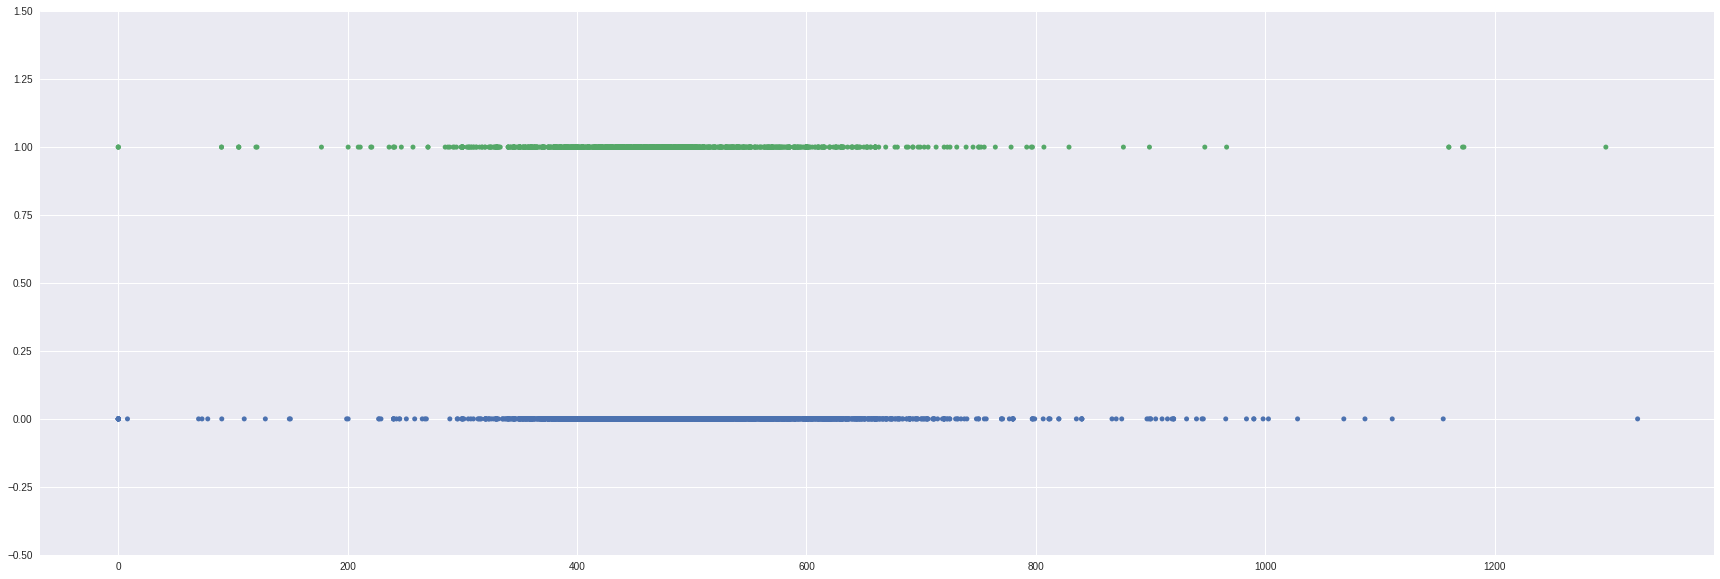

In [0]:
%time
plt.figure(figsize=(30, 10))
ax = sns.swarmplot(x = 'elapsed_time', y = 'gender', data = df_3[df_3.timing == 'breakfast'])
ax.set_xticks([100*x for x in np.arange(7)])

ax = sns.swarmplot(x = 'time', data = temp[temp.gender == 'female'])
ax.set_xticks([100*x for x in np.arange(7)])

In [0]:
sns.swarmplot(x = df_3[df_3.timing == 'breakfast'].time, y = df_3[df_3.timing == 'breakfast'].age_per_10)

In [0]:
sns.swarmplot(x = 'time', hue = 'gender' , y ='age_per_10', data = df_3[df_3.timing == 'breakfast'])

### lunch

In [0]:
create_table_of_age_gender(df_3[df_3.timing == 'lunch'].drop_duplicates(subset = 'user_id'))

,gender
female,356
male,135


,age_per_10
20.0,220
30.0,107
40.0,90
50.0,57
60.0,17


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1218: RuntimeWarning: invalid value encountered in sqrt
  dx = np.sqrt(d ** 2 - dy ** 2) * 1.05


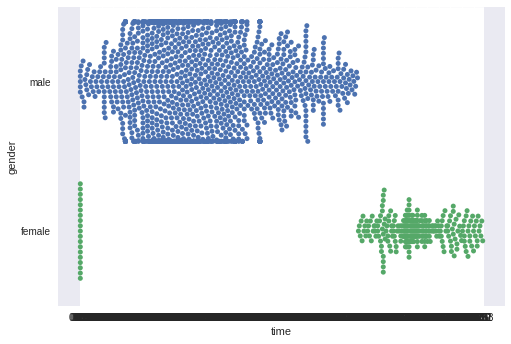

In [0]:
sns.swarmplot(x = df_3[df_3.timing == 'lunch'].time, y = df_3[df_3.timing == 'lunch'].gender)

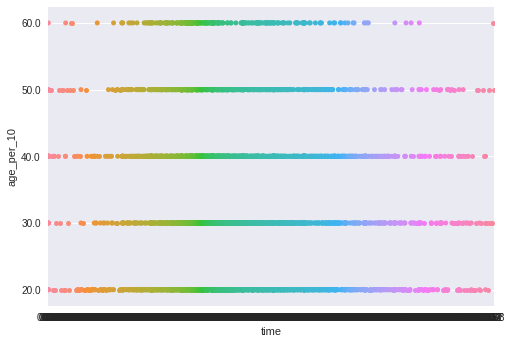

In [0]:
sns.swarmplot(x = df_3[df_3.timing == 'lunch'].time, y = df_3[df_3.timing == 'lunch'].age_per_10)

### dinner

In [0]:
create_table_of_age_gender(df_3[df_3.timing == 'dinner'].drop_duplicates(subset = 'user_id'))

,gender
female,349
male,133


,age_per_10
20.0,214
30.0,108
40.0,87
50.0,57
60.0,16


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1218: RuntimeWarning: invalid value encountered in sqrt
  dx = np.sqrt(d ** 2 - dy ** 2) * 1.05


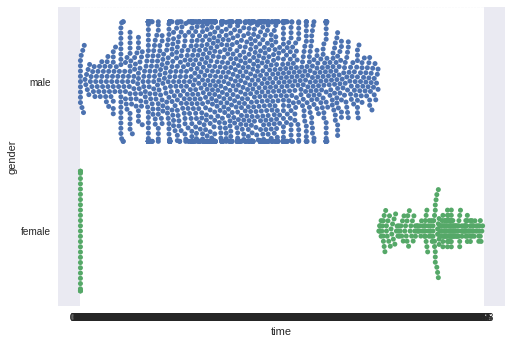

In [0]:
sns.swarmplot(x = df_3[df_3.timing == 'dinner'].time, y = df_3[df_3.timing == 'dinner'].gender)

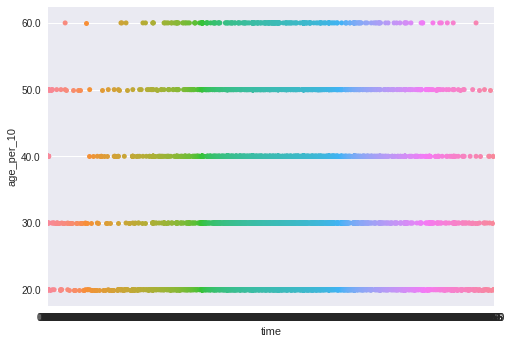

In [0]:
sns.swarmplot(x = df_3[df_3.timing == 'dinner'].time, y = df_3[df_3.timing == 'dinner'].age_per_10)

### drink

In [0]:
create_table_of_age_gender(df_3[df_3.timing == 'drink'].drop_duplicates(subset = 'user_id'))

,gender
female,188
male,49


,age_per_10
20.0,92
30.0,65
40.0,49
50.0,26
60.0,5


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1218: RuntimeWarning: invalid value encountered in sqrt
  dx = np.sqrt(d ** 2 - dy ** 2) * 1.05


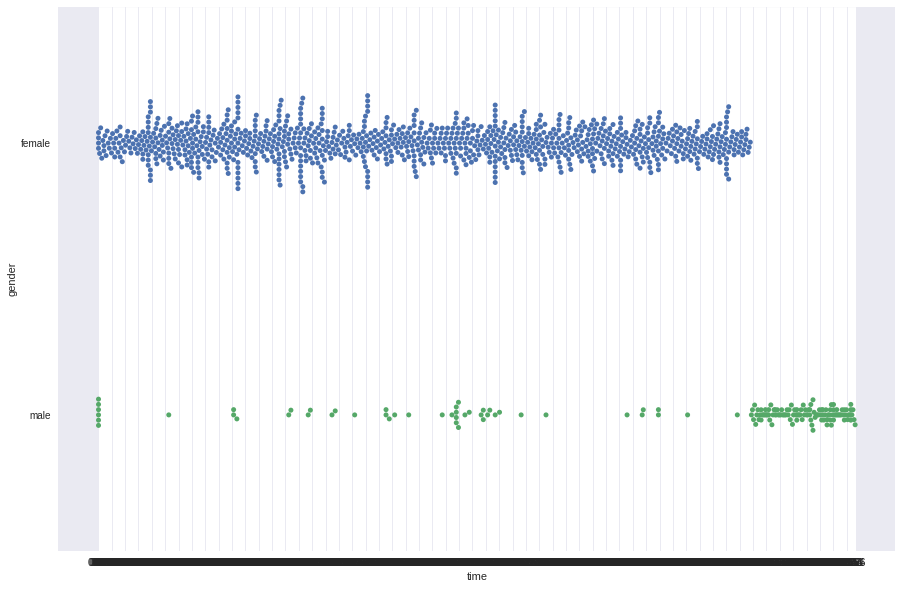

In [0]:
plt.figure(figsize=(15, 10))
g= sns.swarmplot(x = df_3[df_3.timing == 'drink'].time, y = df_3[df_3.timing == 'drink'].gender)

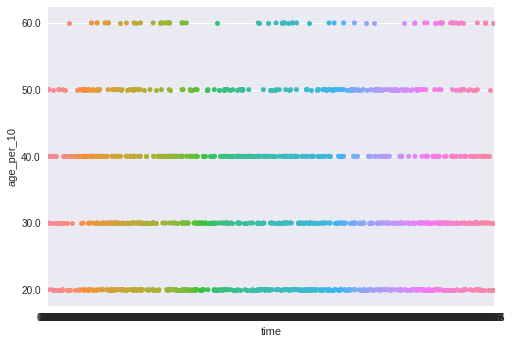

In [0]:
g = sns.swarmplot(x = df_3[df_3.timing == 'drink'].time, y = df_3[df_3.timing == 'drink'].age_per_10)

### snack

In [0]:
create_table_of_age_gender(df_3[df_3.timing == 'snack'].drop_duplicates(subset = 'user_id'))

,gender
female,267
male,81


,age_per_10
20.0,171
30.0,79
40.0,59
50.0,31
60.0,8


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1218: RuntimeWarning: invalid value encountered in sqrt
  dx = np.sqrt(d ** 2 - dy ** 2) * 1.05


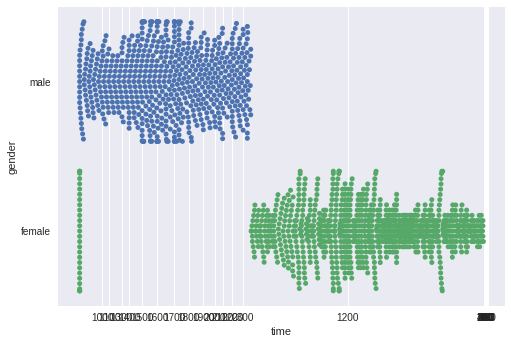

In [0]:
ax = sns.swarmplot(x = df_3[df_3.timing == 'snack'].time, y = df_3[df_3.timing == 'snack'].gender)
ax.set_xticks([str(100*x) for x in np.arange(24)]);

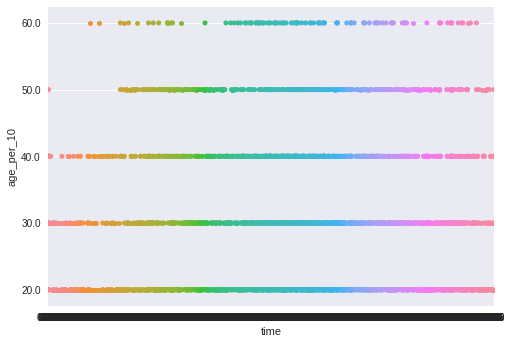

In [0]:
sns.swarmplot(x = df_3[df_3.timing == 'snack'].time, y = df_3[df_3.timing == 'snack'].age_per_10)

---
# 分析
- GLM

In [0]:
from sklearn import preprocessing
import statsmodels.api as sm

### label encode
  -　性別
      - female = 0
      - male = 1

In [0]:
data_label = data.copy()
le = preprocessing.LabelEncoder()
le.fit(data_label['gender'])
data_label['gender'] = le.transform(data_label['gender'])

In [0]:
data_label.head()

In [0]:
df_3.head()

### 分析用df

In [0]:
df1 = pd.merge(df_3[['user_id','timing','ate_at']], data_label[['user_id', 'age', 'gender', 'bmi','elapsed_time','ate_at']], on = ['user_id','ate_at'])

In [0]:
# 0時ちょうどの記録は欠損扱い、工夫の余地あり
df1 = df1[df1.ate_at.dt.strftime('%H:%M:%S') != '00:00:00']

In [0]:
df1.head()

In [0]:
df1_breakfast = df1[df1.timing == 'breakfast']
df1_lunch = df1[df1.timing == 'lunch']
df1_dinner = df1[df1.timing == 'dinner']
df1_snack = df1[df1.timing == 'snack']
df1_drink = df1[df1.timing == 'drink']

In [0]:
def glm_analytics_gaussian(df):
    '''
     正規分布のGLMでsummaryを表示、resultを返す
    '''
    df.x = sm.add_constant(df.drop(columns = ['elapsed_time', 'user_id', 'timing','ate_at']))
    model = sm.GLM(df.elapsed_time, df.x, family=sm.families.Gaussian()) # families指定　
    fit_model = model.fit()
    display(fit_model.summary())
    return fit_model
  
def glm_analytics_gamma(df):
    '''
     ガンマ分布のGLMでsummaryを表示、resultを返す
    '''
    df.x = sm.add_constant(df.drop(columns = ['elapsed_time', 'user_id', 'timing','ate_at']))
    model = sm.GLM(df.elapsed_time, df.x, family=sm.families.Gamma()) # families指定　
    fit_model = model.fit(disp=0)
    display(fit_model.summary())
    return fit_model




## breakfast

In [0]:
df1_breakfast.head()

In [0]:
df1_breakfast.user_id.nunique()

In [0]:
glm_analytics_gaussian(df1_breakfast)

In [0]:
b = glm_analytics_gamma(df1_breakfast)


###  eda

In [0]:
sns.distplot(df1_breakfast.elapsed_time)

In [0]:
print('大体１３時以降に朝食の記録がある記録　:{}'.format(data[(data.elapsed_time >=1000) & (data.timing == 'breakfast')].user_id.count()))
print('大体0時くらいに朝食の記録がある記録　:{}'.format(data[(data.elapsed_time <=100) & (data.timing == 'breakfast')].user_id.count()))

In [0]:
df1_breakfast.info()

In [0]:
sns.heatmap(df1_breakfast.drop(columns = ['ate_at','timing']).astype(float))

## lunch

In [0]:
df1_lunch.head()

In [0]:
glm_analytics_gaussian(df1_lunch)

### eda

In [0]:
sns.distplot(df1_lunch.elapsed_time)

In [0]:
print('大体20時以降に昼食の記録がある記録　:{}'.format(data[(data.elapsed_time >=1200) & (data.timing == 'lunch')].user_id.count()))
print('大体0時くらいに昼食の記録がある記録　:{}'.format(data[(data.elapsed_time <=100) & (data.timing == 'lunch')].user_id.count()))

## dinner

In [0]:
glm_analytics_gaussian(df1_dinner)

### eda

In [0]:
sns.distplot(df1_dinner.elapsed_time)

In [0]:
print('大体１３時以前に夕食の記録がある記録　:{}'.format(data[(data.elapsed_time <=800) & (data.timing == 'dinner')].user_id.count()))

## snack

In [0]:

glm_analytics_gaussian(df1_snack)

### eda

In [0]:
sns.distplot(df1_snack.elapsed_time)

## drink

In [0]:
glm_analytics_gaussian(df1_drink)

### eda

In [0]:
sns.distplot(df1_drink.elapsed_time)